# <img style="float: left; padding-right: 10px; width: 45px" src="iacs.png"> S-109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression


**Harvard University**<br/>
**Summer 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

Names of people you have worked with goes here: 

Abhimanyu Sinha

Jason

<hr style="height:2pt">

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<div class="theme"> Main Theme: Predicting Taxi Pickups in NYC </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `dataset_1.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

<div class="exercise"> <b> Question 1 [10 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `dataset_1.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set dataframe in the variable `train_data`.  Store your test set dataframe in the variable `test_data`.


**1.2**. Generate a scatter plot of the training data points with well-chosen labels on the x and y axes. The time of the day should be on the x-axis and the number of taxi pickups on the y-axis.  Make sure to title your plot.

**1.3**. Does the pattern of taxi pickups make intuitive sense to you? 


### Answers

**1.1**

In [2]:
## Code here
#Import data from csv file into pd dataframe
df_1 = pd.read_csv("dataset_1.csv")
#set random_state to get the same split every time
train_data, test_data = train_test_split(df_1, test_size=0.2, random_state=42)

**1.2**

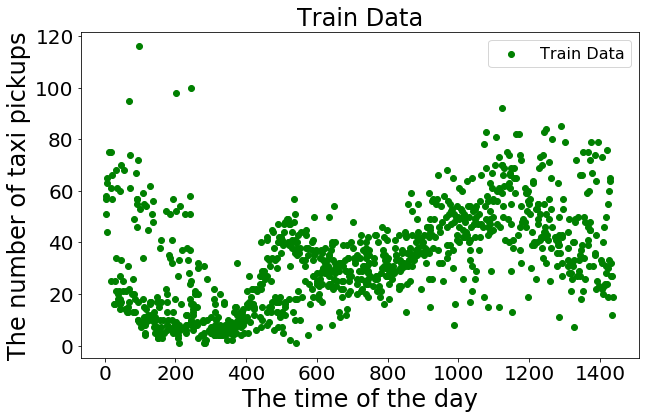

In [3]:
## Code for your plot here
fig, ax= plt.subplots(1,1, figsize=(10,6))
#Plot train data
ax.scatter(train_data['TimeMin'], train_data['PickupCount'], label='Train Data', color='green')
ax.tick_params(labelsize=20)
ax.set_xlabel('The time of the day', fontsize=24) 
ax.set_ylabel('The number of taxi pickups', fontsize=24) 
ax.set_title('Train Data', fontsize=24)
ax.legend(fontsize=16)

**1.3**

**Does the pattern of taxi pickups make intuitive sense to you?**

   [Answer here]
   Yes, it roughly has linear relationship between the time and number of pickups. More specifically the number of taxi pickups seem to decrease from an already low value to almost 0 at around 3 am, and then increases steadily throughout the day, with two peaks, a lower one at about 8:15 am, (morning rush hour), and then another peak at 6:15 pm, evening rush hour. There is more spread during the evening than during the morning, reflecting that although most people start their day at similar times, people tend to leave work (or school) in a lot more flexible time range.

<div class="exercise"> <b>Question 2 [20 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built-in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your predictor variable (aka, feature) and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$ on the training set, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` with a scatter plot of predicted `PickupCount` vs `TimeMin`.  Do the same for the test set.  You should have one figure with 2 x 7 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. In each subplot, use two different colors and/or markers to distinguish k-NN regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$.

**Hints**:
1. Reporting the $R^2$ values in tabular form is encouraged.
2. You should order your reported $R^2$ values by $k$.

**2.4**. Plot the $R^2$ values from the model on the training and test set as a function of $k$ on the same figure.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ visualization on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?
6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?

### Answers

**2.1**

In [4]:
## Code here
x_train=train_data.TimeMin
#Reshape the predictor
Time_train=x_train.values.reshape(x_train.shape[0], 1)
KNNModels={}
for k in [1, 10, 75, 250, 500, 750, 1000]:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    #Fit train data using KNN model
    knnreg.fit(Time_train, train_data.PickupCount)
    KNNModels[k]=knnreg

**2.2**

In [5]:
## Code for your plot here
x_train=train_data.TimeMin
x_test=test_data.TimeMin
#Reshape the predictor
Time_train=x_train.values.reshape(x_train.shape[0], 1)
Time_test=x_test.values.reshape(x_test.shape[0],1)
y_train=np.zeros(len(Time_train))
y_test=np.zeros(len(Time_test))
train_dic={}
test_dic={}
for k in [1, 10, 75, 250, 500, 750, 1000]:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(Time_train, train_data.PickupCount)
    #Predict the yhat using KNN model
    y_train = knnreg.predict(Time_train)
    y_test = knnreg.predict(Time_test)
    #Store the outputs in the dictionaries
    train_dic[k]=y_train
    test_dic[k]=y_test

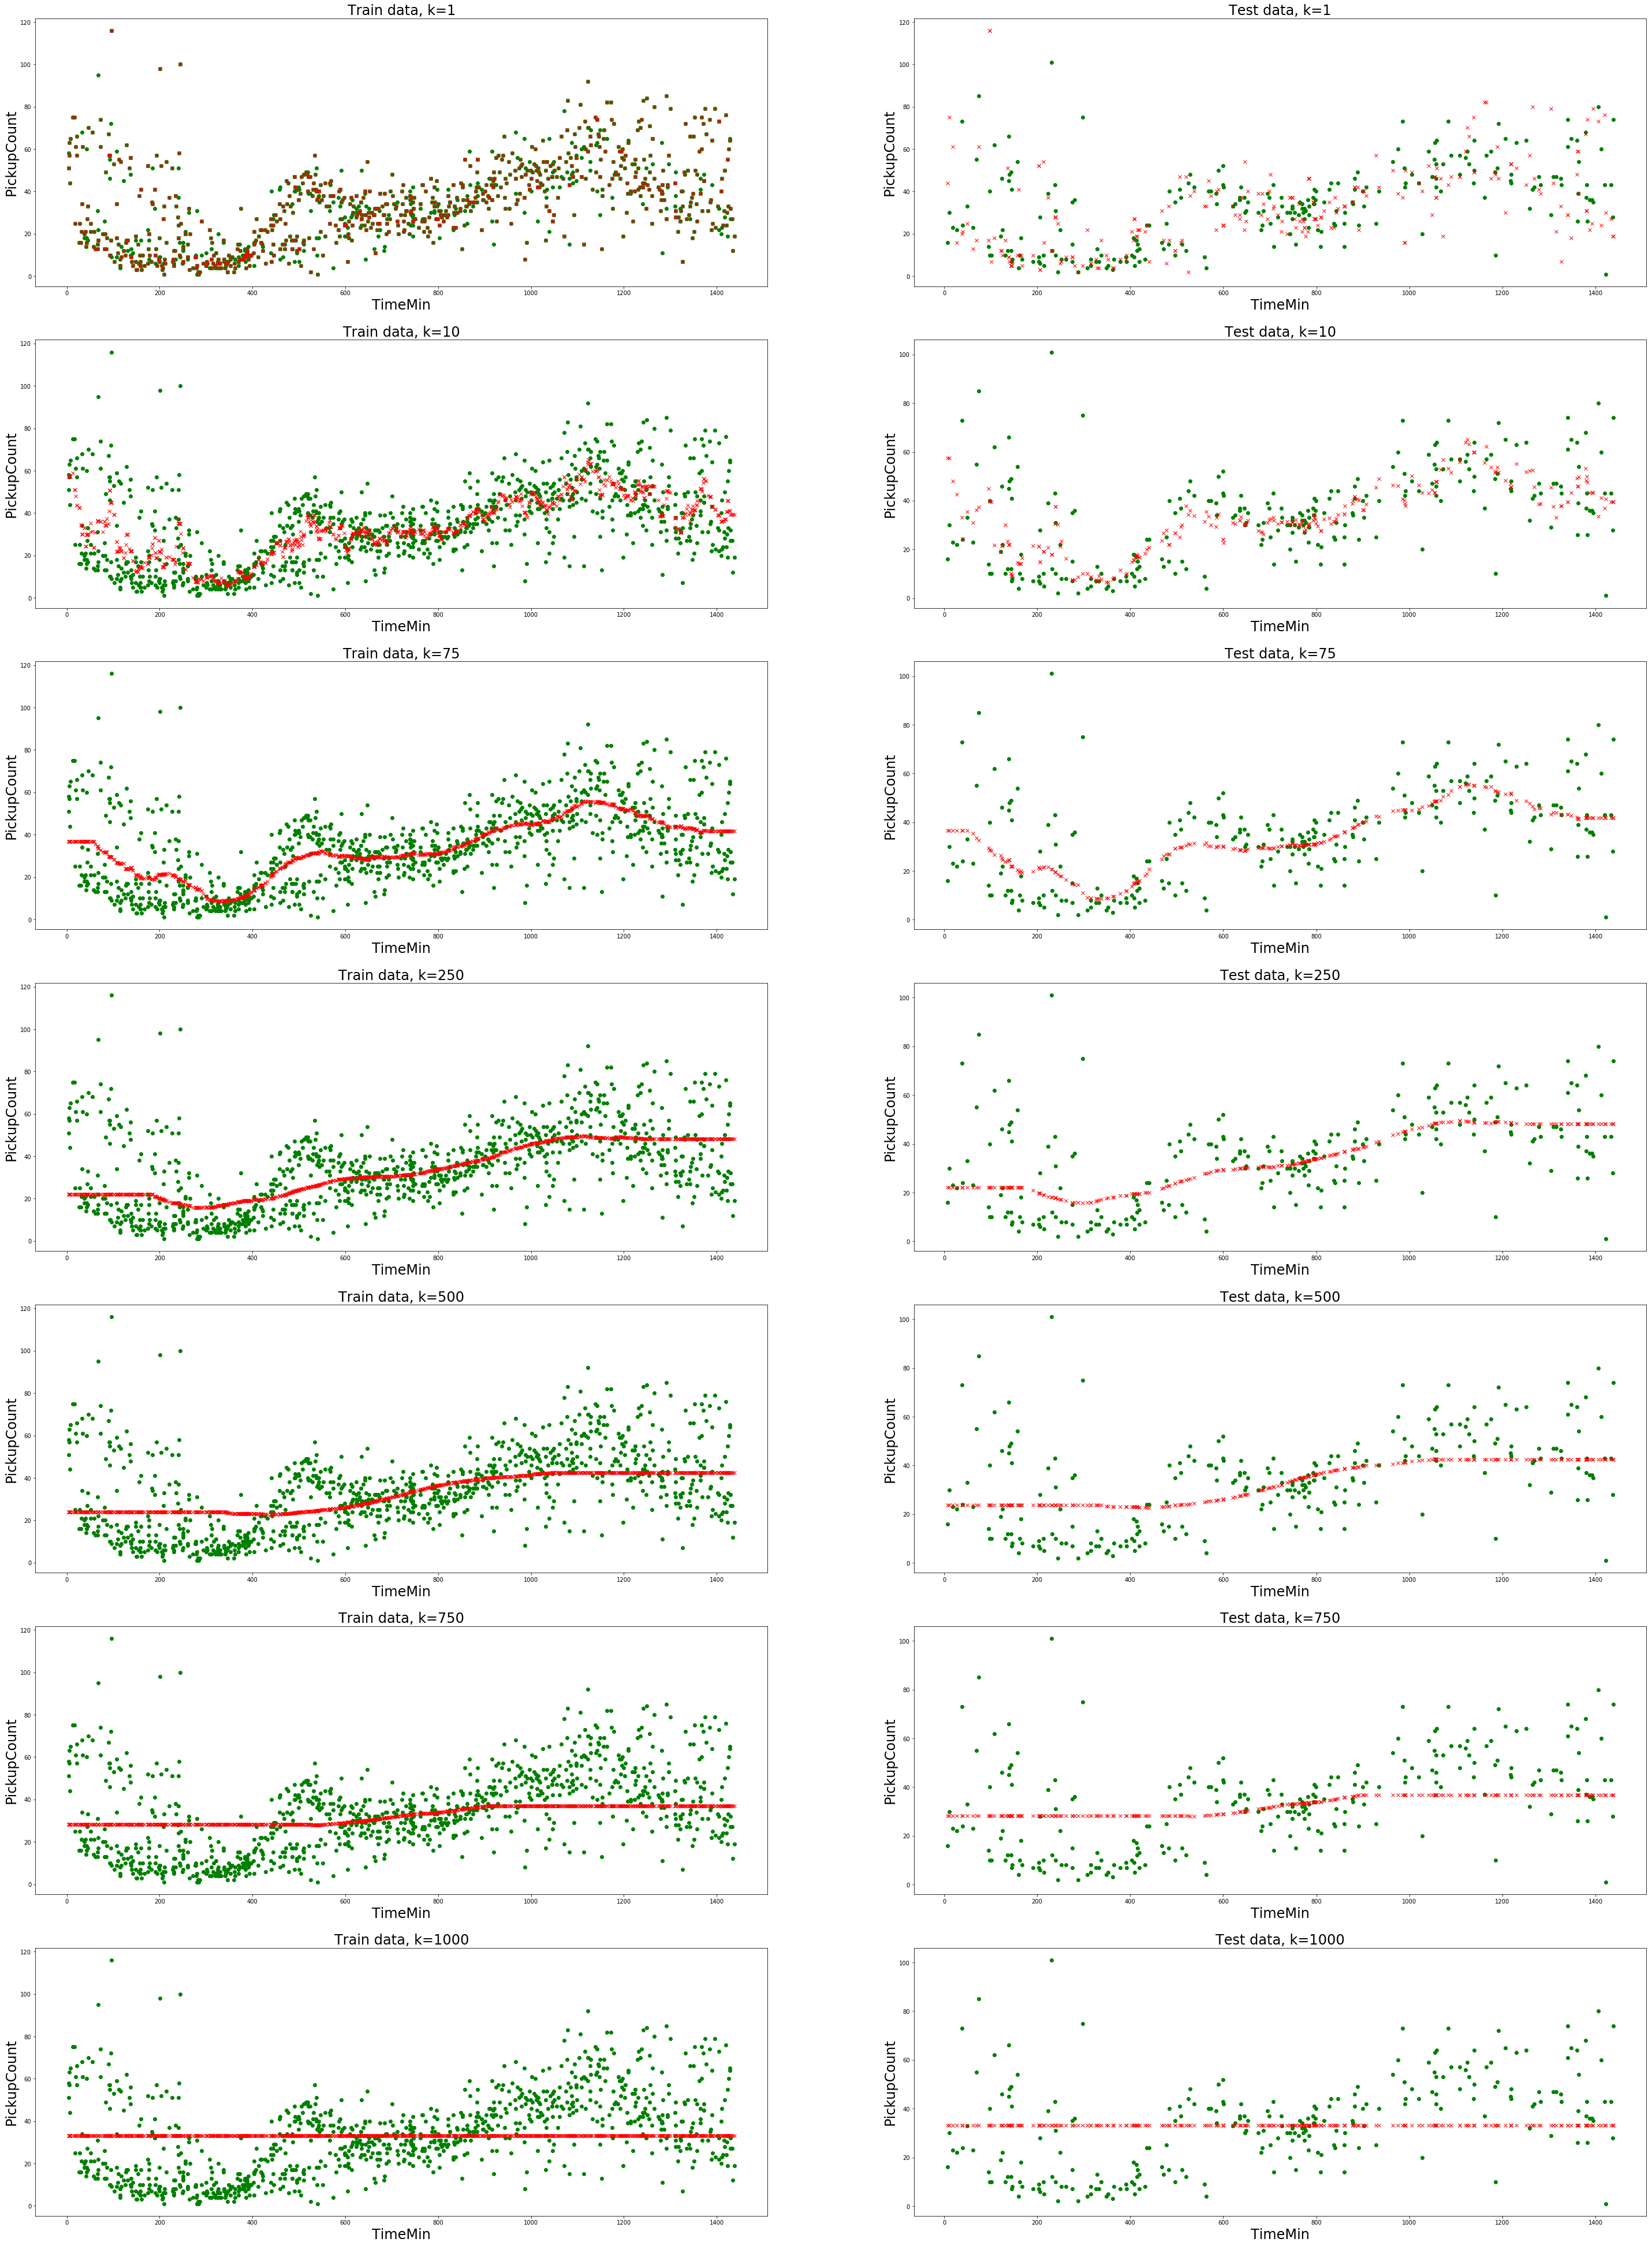

In [6]:
fig, axes = plt.subplots(7, 2, figsize=(50,70))
k = [1, 10, 75, 250, 500, 750, 1000]
for i in range (0, 7):
    #Plot train data with different k values
    axes[i, 0].set_title('Train data, k={}'.format(k[i]), fontsize=24)
    axes[i, 0].set_xlabel('TimeMin', fontsize=24)
    axes[i, 0].set_ylabel('PickupCount', fontsize=24)
    axes[i, 0].plot(x_train, train_data.PickupCount, 'o', color='green')
    axes[i, 0].plot(x_train, train_dic[k[i]], 'x', color ='red')
    #Plot test data with different k values
    axes[i, 1].set_title('Test data, k={}'.format(k[i]), fontsize=24)
    axes[i, 1].set_xlabel('TimeMin', fontsize=24)
    axes[i, 1].set_ylabel('PickupCount', fontsize=24)
    axes[i, 1].plot(x_test, test_data.PickupCount, 'o', color='green')
    axes[i, 1].plot(x_test, test_dic[k[i]], 'x', color='red')

**2.3**

In [7]:
## Code here
score_train={}
score_test={}
for k in [1, 10, 75, 250, 500, 750, 1000]:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(Time_train, train_data.PickupCount)
    #Get R2 scores of train and test data
    score_train1=knnreg.score(Time_train, train_data.PickupCount)
    score_test1=knnreg.score(Time_test, test_data.PickupCount)
    #Save the r2 scores in the dictionary
    score_train[k]=score_train1
    score_test[k]=score_test1

In [8]:
#Create a empty dataframe and store the kvalues, r2 scores into the dataframe
df_R2 = pd.DataFrame()
df_R2['K-value'] = score_train.keys()
df_R2['score_train_R2'] = score_train.values()
df_R2['score_test_R2']=score_test.values()
df_R2

,K-value,score_train_R2,score_test_R2
0,1,0.712336,-0.418932
1,10,0.509825,0.272068
2,75,0.445392,0.390310
3,250,0.355314,0.340341
4,500,0.290327,0.270321
5,750,0.179434,0.164909
6,1000,0.000000,-0.000384


**2.4**

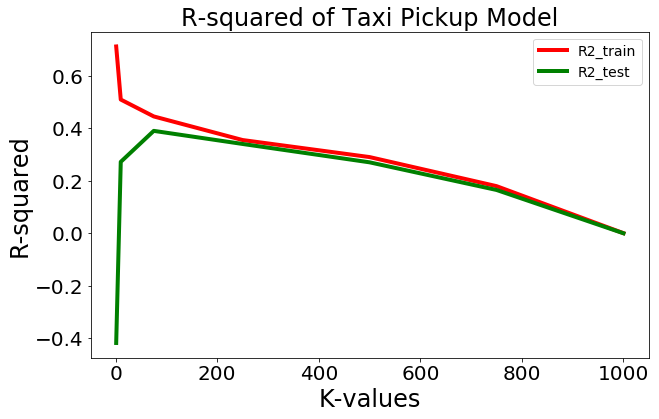

In [9]:
## Code for your plot here

fig, ax= plt.subplots(1,1, figsize=(10,6))
#Plot R2 score of training data vs k values
ax.plot(df_R2['K-value'], df_R2['score_train_R2'], label = "R2_train", color='red', lw=4)
#Plot R2 score of test data vs k values
ax.plot(df_R2['K-value'], df_R2['score_test_R2'], label = "R2_test", color='green', lw=4)
ax.tick_params(labelsize=20)
ax.set_xlabel('K-values', fontsize=24) 
ax.set_ylabel('R-squared', fontsize=24) 
ax.set_title('R-squared of Taxi Pickup Model', fontsize=24)
ax.legend(fontsize=14)

**2.5**

**Discuss the results**


1. *If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?*  

    It means that with this model, every response is just the average of all the observations as $R^2=0$. It is not   a good fitting.
    
2. *What does an $R^2$ score of $0$ mean?*

    If $R^2$ is $0$, the predicted values will always equal to the overall average of the response variable. It is essentially useless, as it just connects a line between the first value and the final value.

3. *What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?*

    If the $R^2$ is negative, it means that the model is even worse than the model just using the mean as the predicted value for every predictor variable, and you would be better off just using the mean instead of the model.
       
4. *Do the training and test $R^2$ plots exhibit different trends?  Describe.* 

    Yes. The training plot started high, then has a sharp drop, and then decreases continueously; For the test plot, it started low, then had a sharp increase, and then decreases till reaching 0 as the training plot did. Both seem to converge towards the same value.
        
5. *How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?*

    When $k$ is small, the model fits the training model very well, but poorly for testing data; When the $k$ value increases, the fitting of the training model is getting worse. It gets slightly better for the test data, but drops back down. Only at a certain $k$ value, the model has optimal $R^2$ values for both training and test data.  
    
6. *What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?*

    In this trial, $k=75$, with training $R^2$ value ($0.445$) and test $R^2$ value ($0.390$) is the best. 
    

<div class="exercise"> <b> Question 3  [20 pts] </b></div>

We next consider simple linear regression for the same train-test data sets, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your predictor variable and `PickupCount` as your response variable.  Create a `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.  You may notice something peculiar about how they compare.

**3.4**. Report the slope and intercept values for the fitted linear model.  

**3.5**. Report the $95\%$ confidence interval for the slope and intercept.

**3.6**. Create a scatter plot of the residuals ($e = y - \hat{y}$) of the linear regression model on the training set as a function of the predictor variable (i.e. `TimeMin`). Place on your plot a horizontal line denoting the constant zero residual.  

**3.7**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?  
4. Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.  
5. Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.

### Answers

**3.1**

In [10]:
Time=train_data.TimeMin
Pickup=train_data.PickupCount
#Reshape the predictor
Time_sp=sm.add_constant(Time)
#build the OLS model (ordinary least squares) from the training data
Taxi_sm=sm.OLS(Pickup, Time_sp)
# do the fit and save regression info (parameters, etc) in OLSModel
OLSModel=Taxi_sm.fit()

In [11]:
OLSModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PickupCount   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     320.4
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           2.34e-62
Time:                        14:59:05   Log-Likelihood:                -4232.9
No. Observations:                1000   AIC:                             8470.
Df Residuals:                     998   BIC:                             8480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7506      1.058     15.838      0.000      14.675      18.826
TimeMin        0.0233      0.001     17.900      0.000       0.021       0.026
==============================================================================
Omnibus:                      203.688   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              462.910
Skew:                           1.111   Prob(JB):                    3.02e-101
Kurtosis:                       5.485   Cond. No.                     1.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**3.2**

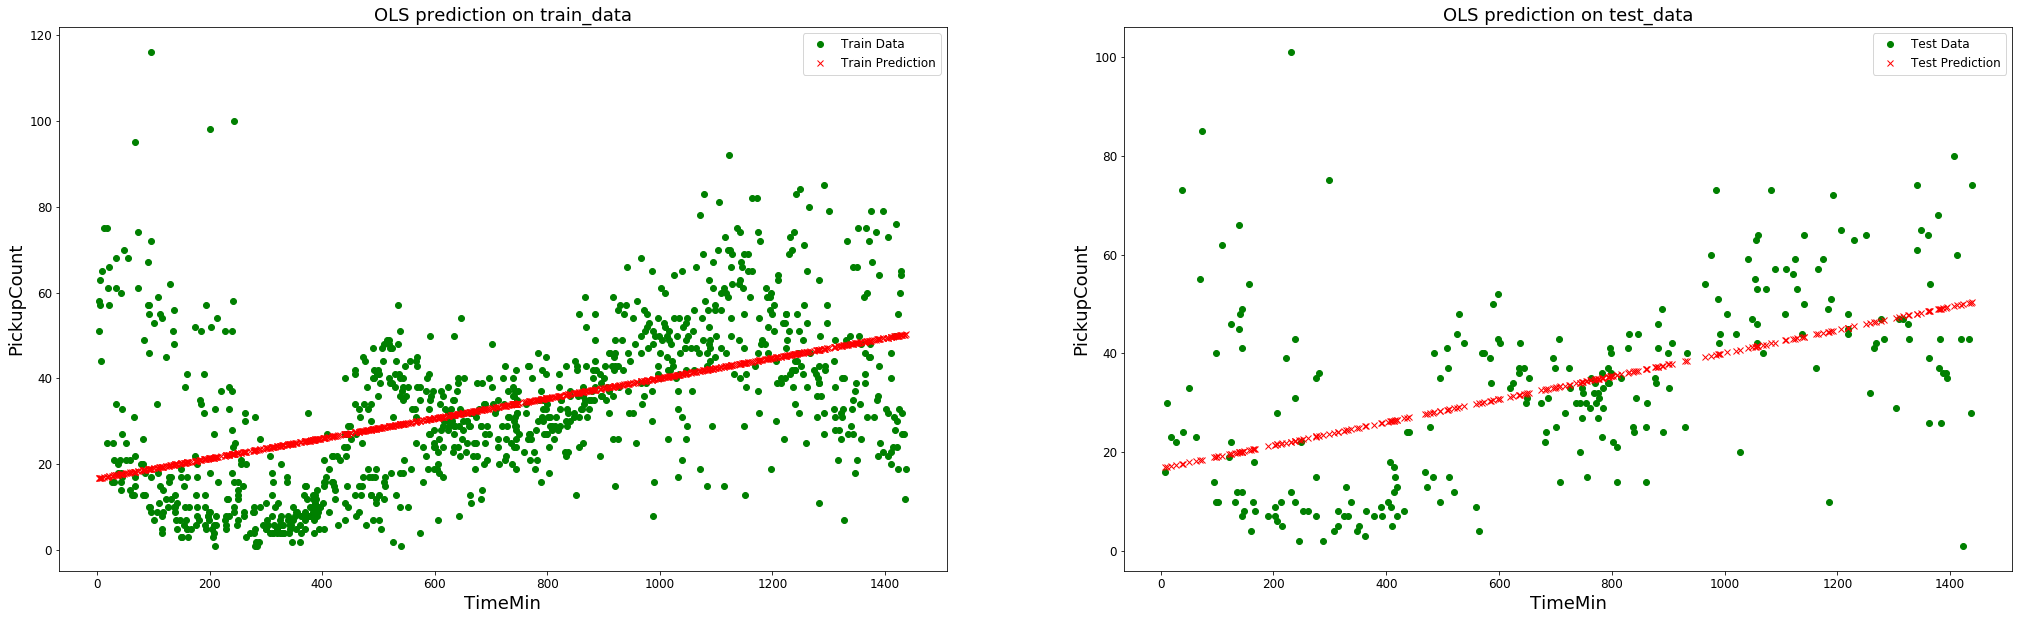

In [12]:
Time_test0=test_data.TimeMin
Time_testsp=sm.add_constant(Time_test0)
## Code for your plot here
#Shape the predictors
Train_olspre=OLSModel.predict(Time_sp)
Test_olspre=OLSModel.predict(Time_testsp)
fig, axes= plt.subplots(1,2, figsize=(35,10))
axes[0].tick_params(labelsize=12)
axes[0].set_title('OLS prediction on train_data', fontsize=18)
axes[0].set_xlabel('TimeMin', fontsize=18)
axes[0].set_ylabel('PickupCount', fontsize=18)
#Plot train data with predicted y
axes[0].plot(x_train, train_data.PickupCount, 'o', label = "Train Data", color= 'green')
axes[0].plot(x_train, Train_olspre, 'x', label = "Train Prediction", color='red')
axes[0].legend(fontsize=12)
axes[1].set_title('OLS prediction on test_data', fontsize=18)
axes[1].set_xlabel('TimeMin', fontsize=18)
axes[1].set_ylabel('PickupCount', fontsize=18)
axes[1].tick_params(labelsize=12)
#Plot test data with predicted y
axes[1].plot(x_test, test_data.PickupCount, 'o', label = "Test Data", color='green')
axes[1].plot(x_test, Test_olspre, 'x', label = "Test Prediction", color='red')
axes[1].legend(fontsize=12)

**3.3**

In [13]:
from sklearn.metrics import r2_score

In [14]:
## Code here
#Rsquared for trained data
R_squared_train=OLSModel.rsquared
print("R^2 for train data: " + str(R_squared_train))

R^2 for train data: 0.243026035319


In [15]:
#Rsquared for test data
print("R^2 for test data: " + str(r2_score(test_data.PickupCount, Test_olspre)))

R^2 for test data: 0.240661535616


**3.4**

In [16]:
## Code here
slope= OLSModel.params[0]
intercept= OLSModel.params[1]
print("The regression coefficients from the statsmodels package are: intercept = {0:8.6f} and slope = {1:8.6f}".format(slope, intercept))

The regression coefficients from the statsmodels package are: intercept = 16.750601 and slope = 0.023335


**3.5**

In [17]:
## Code here
CI = OLSModel.conf_int(0.05, cols=None).T
CI_slope = CI.TimeMin
CI_intercept = CI.const
print("Confidence Interval of 95% for the slope: " + str(CI_slope[0]) + " to " + str(CI_slope[1]))
print("Confidence Interval of 95% for the intercept: " + str(CI_intercept[0]) + " to " + str(CI_intercept[1]))

Confidence Interval of 95% for the slope: 0.0207769728183 to 0.0258933785665
Confidence Interval of 95% for the intercept: 14.6751413447 to 18.8260615102


**3.6**

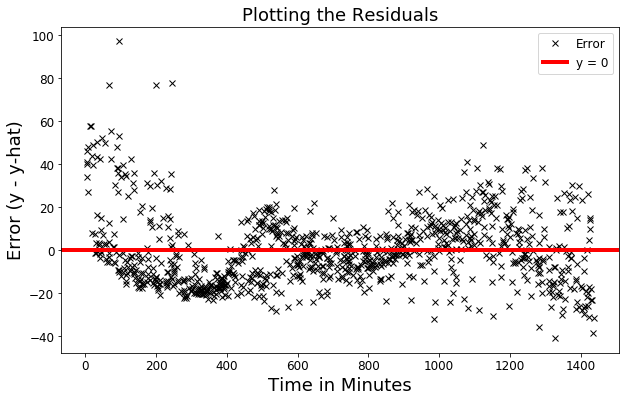

In [18]:
## Code here
#Calculate the error
err=train_data.PickupCount-Train_olspre
fig, ax=plt.subplots(1,1, figsize=(10,6))
ax.tick_params(labelsize=12)
ax.set_title('Plotting the Residuals', fontsize=18)
ax.set_ylabel('Error (y - y-hat)', fontsize=18)
ax.set_xlabel('Time in Minutes', fontsize=18)
#Plot error vs time
ax.plot(Time_train, err, 'x',label = "Error", color='black')
#Add horizontal line, y=0
ax.axhline(y=0, linewidth=4, label = "y = 0", color='r')
ax.legend(fontsize=12)

**3.7**

**Discuss the results**

1. *How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?*

    [Answer here]The test $R^2$ here is 0.240661535616 which less than the best test $R^2$ for our k-NN regression (0.390310).
    

2. *What does the sign of the slope of the fitted linear model convey about the data?* 

    [Answer here]The sign of the slope is positive. This indicates a positive relationship between time of day and the number of taxi pickups i.e. more people use taxis as the day progresses. However, the (absolute) slope value is very small, indicating the predictor doesn't have good influence on the response variable.
    

3. *Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?*  
    
    [Answer here] Yes. The error of the slope is about 0.0026, which is roughly 11% of the estimated slope, and the error of the intercept is about 2.075, which is roughly 12%. Both values are acceptably low.

4. *Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.*  

    [Answer here] It will be looser. Higher confidence interval means smaller alpha value. This can also be intuitively explained in that a higher range means it is more likely that the slope would be in the range, and hence we are more confident about the interval.

5. *Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.*

    [Answer here] The pattern of the residuals looks like raw data. Since the residuals are not random, the assumption of linearity is unlikely valid for this data. The residuals clearly follow a pattern, more scattered and being higher during the early hours and following a zig-zag sort of pattern, which is not seen in a truly random residual plot.


<div class="exercise">  <b> Question 4 [20 pts]: Roll Up Your Sleeves Show Some Class </b> </div>

We've seen Simple Linear Regression in action and we hope that you're convinced it works.  In lecture we've thought about the mathematical basis for Simple Linear Regression.  There's no reason that we can't take advantage of our knowledge to create our own implementation of Simple Linear Regression.  We'll provide a bit of a boost by giving you some basic infrastructure to use.  In the last problem, you should have heavily taken advantage of the `statsmodels` module.  In this problem we're going to build our own machinery for creating Linear Regression models and in doing so we'll follow the `statsmodels` API pretty closely.  Because we're following the `statmodels` API, we'll need to use python classes to create our implementation.  If you're not familiar with python classes don't be alarmed.  Just implement the requested functions/methods in the CS109OLS class that we've given you below and everything should just work.  If you have any questions, ask the teaching staff.

**4.1**. Implement the `fit` and `predict` methods in the CS109OLS class we've given you below as well as the `CS109r2score` function that we've provided outside the class.

**Hints**:

1. `fit` should take the provided numpy arrays `endog` and `exog` and use the normal equations to calculate the optimal linear regression coefficients.  Store those coefficients in self.params
2. In `fit` you'll need to calculate an inverse.  Use np.linalg.pinv
3. `predict` should use the numpy array stored in self.exog and calculate an np.array of predicted values.
4. `CS109r2score` should take the true values of the response variable `y_true` and the predicted values of the response variable `y_pred` and calculate and return the $R^2$ score. 
5.  To replicate the statsmodel API your code should be able to be called as follows:
    ```python
    mymodel = CS109OLS(y_data, augmented_x_data)
    mymodel.fit()
    predictions = mymodel.predict()
    R2score = CS109r2score(true_values, predictions)
    ```

**4.2**. As in 3.1 create a `CS109OLS` class instance and  fit a Linear Regression model on the training set (`train_data`).  Store your model in the variable `CS109OLSModel`.  Remember that as with sm.OLS your class should assume you want to fit an intercept as part of your linear model (so you may need to add a constant column to your predictors).

**4.3**  As in 3.2 Overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` on the training set with a scatter plot of `PickupCount` vs predictions of `TimeMin` from your `CS109OLSModel` Linear Regression model on the training set.  Do the same for the test set.  You should have one figure with two subplots, one subplot for the training set and one for the test set.  How does your figure compare to that in 3.2?

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)

**4.4**. As in 3.3, report the $R^2$ score for the fitted model on both the training and test sets using your `CS109OLSModel`.  Make sure to use the `CS109r2score` that you created.  How do the results compare to the the scores in 3.3?

**4.5**. as in 3.4, report the slope and intercept values for the fitted linear model your `CS109OLSModel`.   How do the results compare to the the values in 3.4?




### Answers

**4.1**

In [19]:
class CS109OLS(object):
    
    def __init__(self, endog = [], exog = []):
        
        ## Make sure you initialize self.params
        self.params = []
              
        ## store exog and endog in instance variables
        self.endog = np.array(endog)
        self.exog = np.array(exog)
  
                    
    def fit(self):
        
        #################
        # Your Code below
        #################
        n = 0
        d = 0
        meanx = np.mean(self.endog)
        meany = np.mean(self.exog)
        #calculating numerator and denominator for beta_1 formula
        for i in range(self.endog.size):
            n += (self.endog[i]-meanx)*(self.exog[i]-meany)
            d += (self.endog[i]-meanx)**2
        
        
        beta_1 = n/d
        beta_0 = meany - beta_1*meanx
        
        self.params = [beta_1, beta_0]
        
        # do something with self.exog and self.endog to calculate 
        # your linear regression coefficients
        # store the result in self.params
        
        return self
            
    def predict(self):
        
        # check if the linear regression coefficients have been calculated
        if not np.array(self.params).size:
            raise(Exception("fit() has not been called on OLS Model!"))
        
        #################
        # Your Code below
        #################
        
        predictions=(self.params[0]*self.endog+self.params[1])
        return predictions
        # calculate your predictions based upon exog/self.exog and return them
        # as a numpy array
                  
            
        
        
def CS109r2score(y_true, y_pred):
    
    
    #################
    # Your Code below
    #################
    
    
    mean = np.mean(y_true)
    
    #numerator:
    n = 0
    for i in range(y_pred.size):
        n += (y_pred[i] - y_true[i])**2
    
    #denominator:
    d = 0
    for i in range(y_true.size):
        d += (mean - y_true[i])**2
        
    #putting it together
    
    R2 = 1 - n/d
    return R2
    


**4.2**

In [20]:
Time=train_data.TimeMin
Pickup=train_data.PickupCount
#Reshape the predictor
Time_train=Time.values.reshape(Time.shape[0], 1)
#build the OLS model (ordinary least squares) from the training data
Taxi_sm=sm.OLS(Pickup, Time_sp)
# do the fit and save regression info (parameters, etc) in OLSModel
OLSModel=Taxi_sm.fit()

In [21]:
mymodel = CS109OLS(Time_train, Pickup)
CS109OLSModel=mymodel.fit()

In [22]:
CS109OLSModel.params

[array([ 0.02333518]), array([ 16.75060143])]

**4.3**

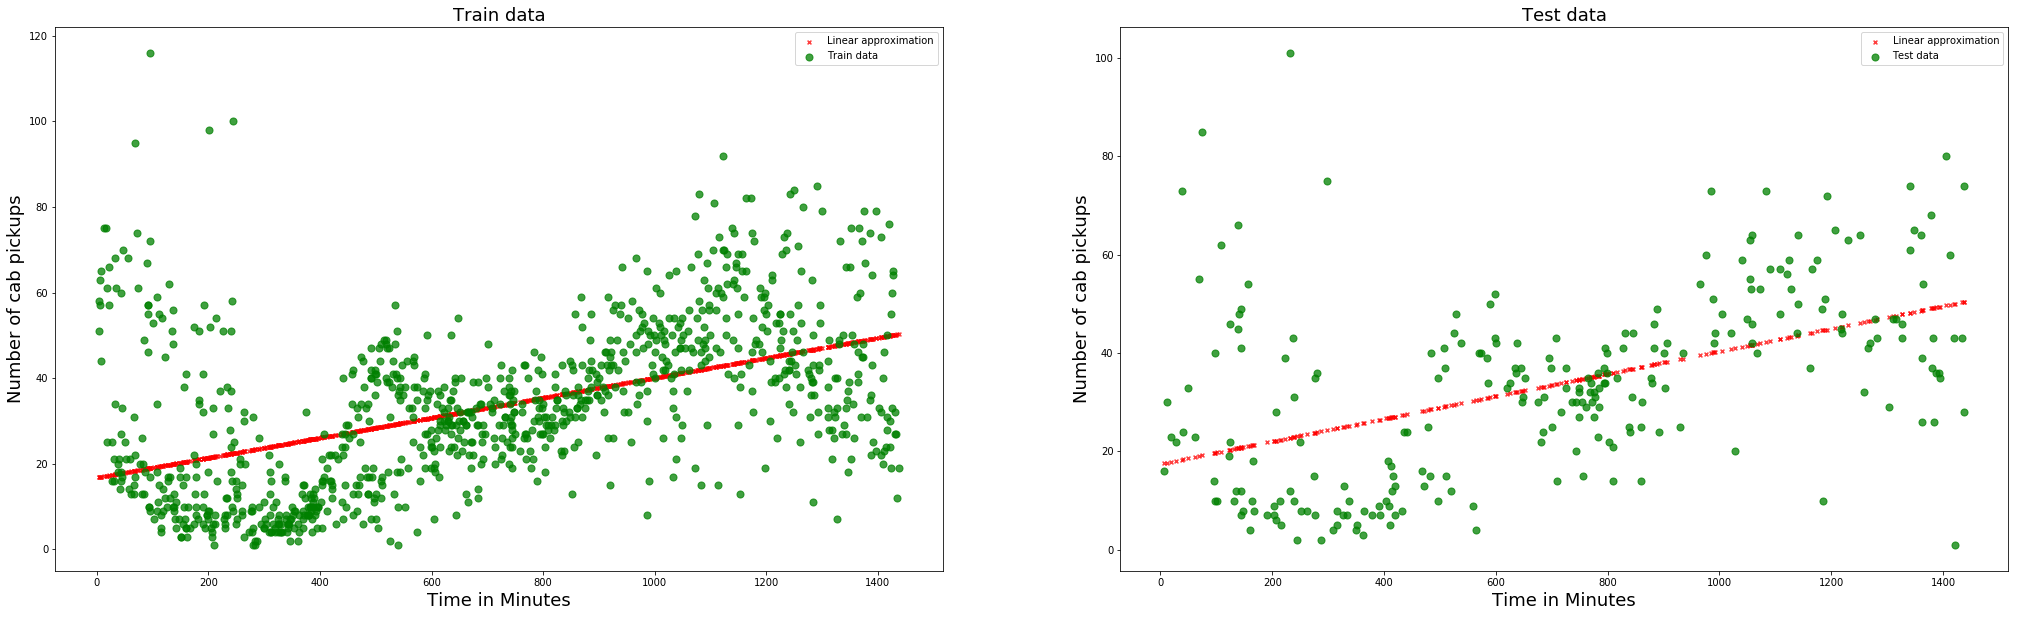

In [23]:
## Code for your plot here
Time1=test_data.TimeMin
Time_test=Time1.values.reshape(Time1.shape[0],1)
Pickup1=test_data.PickupCount
Pickup_pre=mymodel.predict()
fig, a = plt.subplots(1,2, figsize=(35, 10))
a[0].scatter(Time, Pickup_pre, label='Linear approximation', color ='red', alpha = 0.75, s=15, marker = "x")
a[0].scatter(Time, Pickup, label='Train data', s=50, color = 'green', alpha = 0.75, marker = "o")

a[0].set_xlabel('Time in Minutes', fontsize=18)
a[0].set_ylabel('Number of cab pickups', fontsize=18)
a[0].set_title('Train data', fontsize=18)
a[0].legend()

#Plotting the test data along with the approximation using the OLS model
x2 = np.linspace(0, 1440, 250)
a[1].scatter(Time_test, CS109OLS(Time_test, Pickup1).fit().predict(), label='Linear approximation', color ='red', alpha = 0.75, s=15, marker = "x")
a[1].scatter(Time1, Pickup1, label='Test data', s=50, color = 'Green', alpha = 0.75, marker = "o")

a[1].set_xlabel('Time in Minutes', fontsize=18)
a[1].set_ylabel('Number of cab pickups', fontsize=18)
a[1].set_title('Test data', fontsize=18)
a[1].legend()

**4.4**

In [24]:
## Code here
Model = CS109OLS(test_data.TimeMin, test_data.PickupCount).fit()
print("Train data: " + str(CS109r2score(train_data.PickupCount.values.reshape(1000, 1), CS109OLSModel.predict().reshape(1000, 1))))
print("Test data: " + str(CS109r2score(test_data.PickupCount.values.reshape(250, 1), Model.predict().reshape(250,1))))

Train data: [ 0.24302604]
Test data: [ 0.24128118]


The Rsquared scores here are same as the ones in 3.3

**4.5**

In [26]:
## Code here

print("The slope is: " + str(CS109OLSModel.params[0]))
print("The intercept is: " + str(CS109OLSModel.params[1]))


The slope is: [ 0.02333518]
The intercept is: [ 16.75060143]


The slope and intercept calculated with the CS109OLS class is exactly the same as the slope and intercept calculated in Question 3.

<div class="exercise"><b> Question 5 </b></div>.

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.


**5.1**. We've provided you with two files `outliers_train.csv` and `outliers_test.csv` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?

**5.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**5.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?  

**5.4**  In CS109 we're strong believers that creating heuristic models is a great way to build intuition. In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  The return value should be a list `outlier_indices` representing the indices of the outliers in the original datasets you passed in.  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeSimpleModel`.

**Hint:** 
    1. What measure might you use to compare the performance of different Linear Regression models?

**5.5** Create a figure with two subplots.  In one subplot include a visualization of the Linear Regression line from the full training set overlayed on the test set data in `outliers_test`.  In the other subplot include a visualization of the Linear Regression line from the training set data with outliers removed overlayed on the test set data in `outliers_test`.  Visually which model fits the test set data more closely?

**5.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**5.7**. One potential problem with the brute force outlier detection approach in 5.3 and the heuristic algorithm constructed in 5.4 is that they assume prior knowledge of the number of outliers.  In general we can't expect to know ahead of time the number of outliers in our dataset.  Alter the algorithm you constructed in 5.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  Store your algorithm in the function `find_outliers_general`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  It can take additional parameters as long as they have default values set.  The return value should be the list `outlier_indices` representing the indices of the outliers in the original datasets you passed in (in the order that your algorithm found them).  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeGeneralModel`.

**Hints**:
   1. How many outliers should you try to identify in each step? (i.e. is there any reason not to try to identify one outlier at a time)
   2. If you plotted an $R^2$ score for each step the algorithm, what might that plot tell you about stopping conditions?
   3. As mentioned earlier we don't know ahead of time how many outliers to expect in the dataset or know mathematically  how we'd define a point as an outlier.  For this general algorithm, whatever measure you use to determine a point's impact on the Linear Regression model (e.g. difference in R^2, size of the residual or maybe some other measure) you may want to determine a tolerance level for that measure at every step below which your algorithm stops looking for outliers.
   4. You may also consider the maximum possible number of outliers it's reasonable for a dataset of size $n$ to have and use that as a cap for the total number of outliers identified (i.e. would it reasonable to expect all but one point in the dataset to be an outlier?)
    
**5.8**. Run your algorithm in 5.7 on the training set data.  

   1. What outliers does it identify?
   2. How do those outliers compare to the outliers you found in 5.4?
   3. How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?

### Answers

**5.1**

Text(0.5,1,'train data')

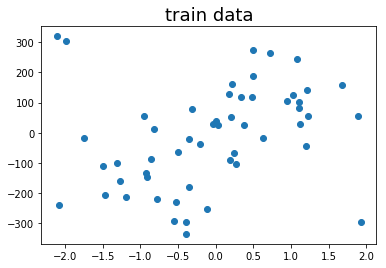

In [27]:
#Visualize train data
df_train=pd.read_csv("outliers_train.csv")
df_test=pd.read_csv("outliers_test.csv")
plt.plot(df_train['X'], df_train['Y'], 'o')
plt.title('train data', fontsize=18)

Text(0.5,1,'test data')

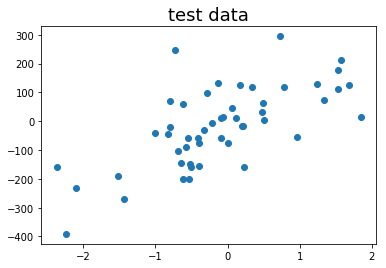

In [28]:
#Visualize test data
plt.plot(df_test['X'], df_test['Y'], 'o')
plt.title('test data', fontsize=18)

*What does a visual inspection of training set tell you about the existence of outliers in the data?*
  
    Three outliers are visibly obvious in the training dataset.

**5.2**

In [29]:
## Code here
#Reshape the predictor
X=sm.add_constant(df_train['X'])
#build the OLS model (ordinary least squares) from the training data
model_ols=sm.OLS(df_train['Y'], X)
# do the fit and save regression info (parameters, etc) in OLSModel
OutlierOLSModel=model_ols.fit()


**5.3**

In [30]:
from scipy.special import comb
num=comb(df_train.shape[0], df_train.shape[0]-3)
num

23426.0

*You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?*
  
    Answer here: Using this method, I will calculate linear regression coefficients 23426 times.


**5.4**

In [31]:
## Code here
def find_outliers_simple(dataset_x, dataset_y):
    outlier_indices=[]
    #Error equals to true_y minus predicted_y
    err=dataset_y-OutlierOLSModel.predict(dataset_x)
    #Sort data by descending order
    outliers_sort=abs(err).sort_values(ascending=False)
    #Write the indices of the first three errors into a list
    outlier_indices=outliers_sort.index.values[:3]
    return outlier_indices


In [32]:
#Output the indices of the outliers
find_outliers_simple(X, df_train['Y'])

array([50, 51, 52])

**5.5**

In [33]:
OutlierOLSModel.params

const    -9.506264
X        47.355423
dtype: float64

In [34]:
df_train = df_train.rename(columns={"Y":"train_Y"})
df_test = df_test.rename(columns={"Y":"test_Y"})
#Remove the outliers
df_train_rmout=df_train[:50]
#Reshape the predictor
X_out=sm.add_constant(df_train_rmout['X'])
#build the OLS model (ordinary least squares) from the training data
model_ols_out=sm.OLS(df_train_rmout['train_Y'], X_out)
# do the fit and save regression info (parameters, etc) in OLSModel
OutlierOLSModel_out=model_ols_out.fit()
#Generate artificial x values
artificial_x = np.linspace(np.min(df_train['X']), np.max(df_train['X']))
#Generate predicted dataset using artificial x values by OLS model without outliers
artificial_y_out=artificial_x*OutlierOLSModel_out.params[1]+OutlierOLSModel_out.params[0]

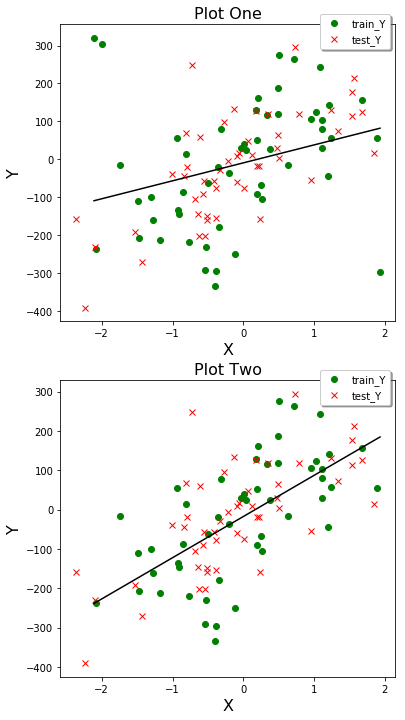

In [35]:
## Code for your plot here
#Generate a artificial dataset to make linear regression line
artificial_y = artificial_x*OutlierOLSModel.params[1]+OutlierOLSModel.params[0]
fig, axes=plt.subplots(2, 1, figsize=(6,12))
axes[0].set_title('Plot One', fontsize=16)
axes[0].set_xlabel('X', fontsize=16)
axes[0].set_ylabel('Y', fontsize=16)
#Plot training data
axes[0].plot(df_train['X'], df_train['train_Y'], 'o', color='green')
#Plot test data
axes[0].plot(df_test['X'], df_test['test_Y'], 'x', color='red')
#Add linear regression line
axes[0].plot(artificial_x, artificial_y, '-', color='black')
axes[0].legend(loc='lower right', shadow=True, bbox_to_anchor=(1.0, 0.9))

axes[1].set_title('Plot Two', fontsize=16)
axes[1].set_xlabel('X', fontsize=16)
axes[1].set_ylabel('Y', fontsize=16)
#Plot training data
axes[1].plot(df_train_rmout['X'], df_train_rmout['train_Y'], 'o', color='green')
#Plot test data
axes[1].plot(df_test['X'], df_test['test_Y'], 'x', color='red')
#Add linear regression line
axes[1].plot(artificial_x, artificial_y_out, '-', color='black')
axes[1].legend(loc='lower right', shadow=True, bbox_to_anchor=(1.0, 0.9))


**5.6**

In [36]:
## Code here
#Calculate the R score of train data with outliers
R_squared_train_withoutlier=OutlierOLSModel.rsquared
R_squared_train_withoutlier

0.084202409651746857

In [37]:
#Calculate the R score of the train data after outliers removal
R_squared_train_no_outlier=OutlierOLSModel_out.rsquared
R_squared_train_no_outlier

0.40370604559584822

The model without outliers has a higher $R^2$ value. This means that it is more accurate.

**5.7**

In [38]:
#Reload the dataframe and rename the Y column
df_train=pd.read_csv("outliers_train.csv")
df_train = df_train.rename(columns={"Y":"train_Y"})

In [39]:
## Code here
def find_outliers_general(dataset_x, dataset_y):
    outlier_list=[]
    #Look for outliers until the loop returns nothing
    while (outlier_list==[]):
        #Loop rounds of outlier search
        for _ in range(0, len(dataset_y)):
            #Loop through the dataframe to find outliers
            for i in range(0, len(dataset_y)):
                #If the index has been used, pass it
                if i in outlier_list:
                    continue
                outlier_sub=[]
                #Calculate the error (y-yhat)
                error_out=dataset_y[i]-OutlierOLSModel.predict(dataset_x)[i]
                #Locate outliers and add into outlier_list
                if abs(error_out)>2*np.std(dataset_y):
                    outlier_sub.append(i)
                    outlier_list.append(i)
                    #Remove outliers
                    dataset_y=dataset_y.drop([i])
        #Stop loop when the loop returns empty list
        if outlier_sub==[]:
            break
    return outlier_list

**5.8**

In [40]:
## Code here
#Call the funtion to find outliers
find_outliers_general(X, df_train['train_Y'])

[50, 51, 52, 1]

1. *What outliers does it identify?*
    
    [Answer here] Here, four outliers were identified by their indices:1, 50, 51, 52.
    
2. *How do those outliers compare to the outliers you found in 5.4?*
    
    [Answer here] Compare to 5.4, an additional outlier was located, which has index 1.
    
3. *How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?*

    [Answer here] The general outlier model is more powerful than the simple one. It could find outliers which couldn't be found by simply visually analysing the data.
    

---- 


In [41]:
from IPython.core.display import HTML
def css_styling(): styles = open("cs109.css", "r").read(); return HTML(styles)
css_styling()